# Wrangle and Analyze Data



## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)

<a id='intro'></a>
## Introduction



The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## Gathering data

**1. Twitter archive file**

In [1]:
#import packages and libraries

import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read in the WeRateDogs Twitter archive (.csv file) sent to Udacity via email
#Set as dataframe 'ta'

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**2. Tweet image prediction**

In [6]:
#Download the dog image prediction files from the Udacity server using the Request library via URL

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [7]:
#Read the dog image prediction .tsv file
#Set as dataframe 'dip'

dip = pd.read_csv('image-predictions.tsv', sep='\t' )

In [8]:
dip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# Download the tsv file using the Requests library and the given URL
url =' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)
dip = pd.read_csv('image-predictions.tsv', sep = '\t')
dip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API**

In [10]:
#Keys and Tokens

api_key = "HIDDEN"
api_secret_key = "HIDDEN"
access_token = "HIDDEN"
access_token_secret = "HIDDEN"

In [11]:
#Authentication

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [12]:
# List of tweets

tw_list = []

# List of Exceptions

ex_list = []

# For loop to add each matched tweet json to tw_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] # How many followers the user had
        user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
        date_time = tweet['created_at'] # The date and time of the creation
        
        tw_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        ex_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 205


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 104


In [14]:
# length of the result
print("Number of Results", len(tw_list))

# length of the errors
print("Number of Errors", len(ex_list))

Number of Results 2331
Number of Errors 25


In [15]:
print("The length of the result", len(tw_list))

The length of the result 2331


In [16]:
# Create DataFrames from json
json_tweets = pd.DataFrame(tw_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [17]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

<a id='assess'></a>
## Assessing data

### Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [18]:
# random sample data ta

twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
710,784826020293709826,NaN,NaN,2016-10-08 18:41:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He's going D1 for sure. Insane ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
537,806629075125202948,NaN,NaN,2016-12-07 22:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
38,884925521741709313,NaN,NaN,2017-07-12 00:01:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,None,None
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,None,None,None,None,None
222,849668094696017920,NaN,NaN,2017-04-05 17:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gidget. She's a spy pup...,8.331247e+17,4.196984e+09,2017-02-19 01:23:00 +0000,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,None,None,pupper,None
50,882627270321602560,NaN,NaN,2017-07-05 15:48:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has his first swim lesson ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882627270...,13,10,Stanley,None,None,None,None
1161,723912936180330496,NaN,NaN,2016-04-23 16:34:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She's a Bolivian Superfloof. Sp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723912936...,12,10,Sugar,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None


In [19]:
# ta info

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# random dip sample data

dip.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1935,859924526012018688,https://pbs.twimg.com/media/C-8QypZXcAAekaF.jpg,1,French_bulldog,0.254587,True,Staffordshire_bullterrier,0.192558,True,hog,0.100270,False
146,668627278264475648,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg,1,French_bulldog,0.965403,True,pug,0.008604,True,Boston_bull,0.008004,True
362,672834301050937345,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg,1,Pembroke,0.582560,True,Cardigan,0.258869,True,nipple,0.033835,False
1838,837471256429613056,https://pbs.twimg.com/media/C59LpELWUAEUmYh.jpg,1,Norwegian_elkhound,0.976255,True,keeshond,0.013990,True,seat_belt,0.002111,False
1198,740699697422163968,https://pbs.twimg.com/media/Ckd-bqVUkAIiyM7.jpg,1,lawn_mower,0.878863,False,swing,0.024535,False,barrow,0.019577,False
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True
2012,879050749262655488,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,1,tabby,0.311861,False,window_screen,0.169123,False,Egyptian_cat,0.132932,False
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
1311,754449512966619136,https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg,1,beagle,0.858513,True,basset,0.076012,True,English_foxhound,0.016246,True
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,0.730152,False,beach_wagon,0.078661,False,car_wheel,0.064346,False


In [21]:
# dip info

dip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# random tweet_data sample data 

tweet_data.sample(25)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
756,776201521193218049,9757,2548,8784375,146205,2016-09-14 23:30:38+00:00
1359,700847567345688576,2451,501,8784383,146205,2016-02-20 01:00:55+00:00
113,870063196459192321,34649,7717,8784365,146204,2017-05-31 23:43:25+00:00
1793,676593408224403456,4494,2121,8784392,146205,2015-12-15 02:43:33+00:00
2107,670079681849372674,2140,1170,8784394,146205,2015-11-27 03:20:20+00:00
535,804413760345620481,0,3308,8784368,146205,2016-12-01 19:56:00+00:00
1747,678278586130948096,11299,6004,8784392,146205,2015-12-19 18:19:51+00:00
1076,735648611367784448,4019,1097,8784381,146205,2016-05-26 01:47:51+00:00
1939,673350198937153538,726,201,8784388,146205,2015-12-06 03:56:12+00:00
1307,705591895322394625,3147,1149,8784383,146205,2016-03-04 03:13:11+00:00


In [23]:
# tweet_data info

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


<a id='quality'></a>
### Quality

*Completeness, validity, accuracy, consistency (content issues)*

### *twitter_archive*
(1) Remove retweets to keep only original ratings with images.

(2) Remove superfluous rows and columns.

(3) Datatype conversion in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id to string datatype

(4) The numerator and denominator columns have invalid values.

(5) Dog name is not always accurate: 'a', 'actually', 'all', 'by', 'getting' etc

(6) Missing values in the dog stages column showing up as 'None'

(7) Get rid of unwanted columns

(8) Creating a new ratings column.

### *image_prediction*
(1) Drop duplicates

(2) Remove superfluous columns

### *tweet_json*
1. Keep original tweets only


<a id='tidiness'></a>
### Tidiness 

1. The three data sets need to be merged
2. All tables should be part of one dataset ... need to melt the doggo, floofer, pupper and puppo twitter archive columns into a single 'stage' column

<a id='clean'></a>
## Cleaning Data

In [24]:
# Copy the dataframes 

twitter_archive_clean = twitter_archive.copy()
dip_clean = dip.copy()
tweet_data_clean = tweet_data.copy()

<a id='clean'></a>
## Tidiness Issues 1

<a id='clean'></a>
Define


<a id='clean'></a>
The three data sets need to be merged



<a id='clean'></a>
Code


In [25]:
# merge dip into ta table

twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [26]:
# merge tweet_data into ta table

twitter_archive_clean = twitter_archive_clean.merge(dip_clean, on='tweet_id', how='inner')

<a id='clean'></a>
Test


In [27]:
# test merge

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

<a id='clean'></a>
## Tidiness Issues 2

<a id='clean'></a>
Define


All tables should be part of one dataset ... need to melt the doggo, floofer, pupper and puppo twitter archive columns into a single 'dog_stage' column

<a id='clean'></a>
Code


In [28]:
# Select melt and stay columns

MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in twitter_archive_clean.columns.tolist() if x not in MELTS_COLUMNS]

In [29]:
# Melt the columns

twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')

In [30]:
# Drop superfluous column

twitter_archive_clean = twitter_archive_clean.drop('stages', 1)

<a id='clean'></a>
Test

In [31]:
# test

print('Value Counts' + '\n')
print(twitter_archive_clean.dog_stage.value_counts())

Value Counts

None       7905
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64


Define

Remove superfluous rows and columns

Code

In [32]:

# Delete the retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

# Delete duplicated tweet_id
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

# Delete tweets with no pictures
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])

# Delete columns related to retweet we don't need anymore
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
twitter_archive_clean = twitter_archive_clean.drop('date_time', 1)

# Convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

# Extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

# Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

Test

In [33]:
# Test
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'year',
 'month',
 'day']

Define

Correct Numerators

Code

In [34]:
# Correct

twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

#First change numerator and denominators type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 7053
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2303 non-null   int64  
 1   in_reply_to_status_id  27 non-null     float64
 2   in_reply_to_user_id    27 non-null     float64
 3   source                 2303 non-null   object 
 4   text                   2303 non-null   object 
 5   expanded_urls          2303 non-null   object 
 6   rating_numerator       2303 non-null   float64
 7   rating_denominator     2303 non-null   float64
 8   name                   2303 non-null   object 
 9   favorites              2303 non-null   int64  
 10  retweets               2303 non-null   int64  
 11  user_followers         2303 non-null   int64  
 12  user_favourites        2303 non-null   int64  
 13  jpg_url                2303 non-null   object 
 14  img_num                2303 non-null   int64  
 15  p1  

Test

In [35]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\turki\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
548,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
603,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1438,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
4721,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


Define

Correct Denominators

Code

In [36]:
# Update both numerators and denominators: 

# Tweets with denominator not equal to 10 
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

# Tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

Test

In [37]:
# Test Only the group dogs cleaned
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                            'text',
                                                            'rating_numerator',
                                                            'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
336,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
722,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
911,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1009,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1034,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1052,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1118,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1194,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1366,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1367,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


Define

Drop duplicates jpg_url

Code

In [38]:
#CODE: Delete duplicated jpg_url
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset=['jpg_url'], keep='last')

Test

In [39]:
# Test
sum(twitter_archive_clean['jpg_url'].duplicated())

0

Define

Create column for the image prediction and column for the confidence level

Code

In [40]:
# The first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

# Create a function with nested if to capture the dog type and confidence level
# From the first 'true' prediction
def image(twitter_archive_clean):
    if twitter_archive_clean['p1_dog'] == True:
        dog_type.append(twitter_archive_clean['p1'])
        confidence_list.append(twitter_archive_clean['p1_conf'])
    elif twitter_archive_clean['p2_dog'] == True:
        dog_type.append(twitter_archive_clean['p2'])
        confidence_list.append(twitter_archive_clean['p2_conf'])
    elif twitter_archive_clean['p3_dog'] == True:
        dog_type.append(twitter_archive_clean['p3'])
        confidence_list.append(twitter_archive_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

# Series objects having index the image_prediction_clean column.        
twitter_archive_clean.apply(image, axis=1)

# Create new columns
twitter_archive_clean['dog_type'] = dog_type
twitter_archive_clean['confidence_list'] = confidence_list

# Drop rows that have prediction_list 'error'
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['dog_type'] != 'Error']

Test

In [41]:
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 7053
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1678 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   source                 1678 non-null   object 
 4   text                   1678 non-null   object 
 5   expanded_urls          1678 non-null   object 
 6   rating_numerator       1678 non-null   float64
 7   rating_denominator     1678 non-null   float64
 8   name                   1678 non-null   object 
 9   favorites              1678 non-null   int64  
 10  retweets               1678 non-null   int64  
 11  user_followers         1678 non-null   int64  
 12  user_favourites        1678 non-null   int64  
 13  jpg_url                1678 non-null   object 
 14  img_num                1678 non-null   int64  
 15  p1  

Define

Delete superfuous image columns

Code

In [42]:
# Delete columns

twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'in_reply_to_status_id',
                         'in_reply_to_user_id', 'expanded_urls',
                            'p1_conf', 'p1_dog', 
                            'p2', 'p2_conf', 
                            'p2_dog', 'p3', 
                            'p3_conf', 
                            'p3_dog'], 1)

Test

In [43]:
# Test
list(twitter_archive_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'dog_stage',
 'year',
 'month',
 'day',
 'dog_type',
 'confidence_list']

Define

Change tweet_id from str to int

Code

In [44]:
# Change tweet_id from str to int
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(int)

Test

In [45]:
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 7053
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1678 non-null   int32  
 1   source              1678 non-null   object 
 2   text                1678 non-null   object 
 3   rating_numerator    1678 non-null   float64
 4   rating_denominator  1678 non-null   float64
 5   name                1678 non-null   object 
 6   favorites           1678 non-null   int64  
 7   retweets            1678 non-null   int64  
 8   user_followers      1678 non-null   int64  
 9   user_favourites     1678 non-null   int64  
 10  jpg_url             1678 non-null   object 
 11  dog_stage           1678 non-null   object 
 12  year                1678 non-null   int64  
 13  month               1678 non-null   int64  
 14  day                 1678 non-null   int64  
 15  dog_type            1678 non-null   object 
 16  confid

Define

Need to replace name that are likely not real such as 'a', 'an' etc

code

In [47]:
dogsname = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for word in dogsname:
    twitter_archive_clean.loc[twitter_archive_clean.name == word, 'name'] = None

Test

In [48]:
twitter_archive_clean.name.value_counts()

Cooper      10
Charlie      9
Tucker       9
Oliver       9
Lucy         9
            ..
Tilly        1
Tripp        1
Benedict     1
Bradlay      1
Ester        1
Name: name, Length: 839, dtype: int64

Define

Replace missing dog stages by 'None'

Code

In [50]:
type_stages = ['dog_stage']

for dog_stage in type_stages:
    twitter_archive_clean.loc[twitter_archive_clean[dog_stage] == 'None', dog_stage] = None

Test

In [51]:
twitter_archive_clean.dog_stage.value_counts()

pupper     176
puppo       22
floofer      7
Name: dog_stage, dtype: int64

In [52]:
twitter_archive_clean.dog_stage.head(10)

1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
10    None
11    None
Name: dog_stage, dtype: object

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 7053
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1678 non-null   int32  
 1   source              1678 non-null   object 
 2   text                1678 non-null   object 
 3   rating_numerator    1678 non-null   float64
 4   rating_denominator  1678 non-null   float64
 5   name                1188 non-null   object 
 6   favorites           1678 non-null   int64  
 7   retweets            1678 non-null   int64  
 8   user_followers      1678 non-null   int64  
 9   user_favourites     1678 non-null   int64  
 10  jpg_url             1678 non-null   object 
 11  dog_stage           205 non-null    object 
 12  year                1678 non-null   int64  
 13  month               1678 non-null   int64  
 14  day                 1678 non-null   int64  
 15  dog_type            1678 non-null   object 
 16  confid

Define

Get rid of unwanted columns

Code

In [54]:
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

Test

In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 7053
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1678 non-null   int32 
 1   source           1678 non-null   object
 2   text             1678 non-null   object
 3   name             1188 non-null   object
 4   favorites        1678 non-null   int64 
 5   retweets         1678 non-null   int64 
 6   user_followers   1678 non-null   int64 
 7   user_favourites  1678 non-null   int64 
 8   jpg_url          1678 non-null   object
 9   dog_stage        205 non-null    object
 10  year             1678 non-null   int64 
 11  month            1678 non-null   int64 
 12  day              1678 non-null   int64 
 13  dog_type         1678 non-null   object
 14  confidence_list  1678 non-null   object
dtypes: int32(1), int64(7), object(7)
memory usage: 203.2+ KB


Define

Creating a new ratings column

Code

In [74]:
ratings = twitter_archive_clean.text.str.extract('(\d+(\.\d+)*\/\d+)')

Test

In [75]:
# Create a new rating column
twitter_archive_clean['ratings'] = ratings[0]

In [76]:
twitter_archive_clean

,tweet_id,source,text,name,favorites,retweets,user_followers,user_favourites,jpg_url,dog_stage,year,month,day,dog_type,confidence_list,rating,ratings
1,1100394498,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,31260,5701,8784362,146204,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,2017,8,1,Chihuahua,0.323581,13/10,13/10
2,-1286119424,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,23535,3780,8784362,146204,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,2017,7,31,Chihuahua,0.716012,12/10,12/10
3,-1885904896,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,39541,7877,8784362,146204,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,2017,7,30,Labrador_retriever,0.168086,13/10,13/10
4,1079468032,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,37758,8486,8784362,146204,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,None,2017,7,29,basset,0.555712,12/10,12/10
5,664186880,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,19013,2844,8784362,146204,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,None,2017,7,29,Chesapeake_Bay_retriever,0.425595,13/10,13/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,26697728,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,None,7405,3454,8784380,146205,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,puppo,2016,7,11,Labrador_retriever,1.00288e-05,11/10,11/10
6949,55992321,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,Cooper,5095,1300,8784380,146205,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,puppo,2016,7,7,Labrador_retriever,0.92939,10/10,10/10
7011,-1122562048,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,Abby,2966,620,8784381,146205,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,puppo,2016,6,20,Old_English_sheepdog,0.427481,9/10,9/10
7022,504770560,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,Kilo,4224,1224,8784380,146205,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,puppo,2016,6,16,malamute,0.442612,10/10,10/10


In [77]:
twitter_archive_clean.drop(['rating'], axis=1, inplace=True)

In [78]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 7053
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1678 non-null   int32 
 1   source           1678 non-null   object
 2   text             1678 non-null   object
 3   name             1188 non-null   object
 4   favorites        1678 non-null   int64 
 5   retweets         1678 non-null   int64 
 6   user_followers   1678 non-null   int64 
 7   user_favourites  1678 non-null   int64 
 8   jpg_url          1678 non-null   object
 9   dog_stage        205 non-null    object
 10  year             1678 non-null   int64 
 11  month            1678 non-null   int64 
 12  day              1678 non-null   int64 
 13  dog_type         1678 non-null   object
 14  confidence_list  1678 non-null   object
 15  ratings          1678 non-null   object
dtypes: int32(1), int64(7), object(8)
memory usage: 216.3+ KB


## Store, Analyze, and Visualize Master Data

In [79]:
#Store the clean DataFrame in a CSV file
twitter_archive_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [80]:
# There is a strong relationship between retweets and favorite counts (0.93). 
# As a tweet gains Favorites, one can expect to see retweets to increase and vice versa.

twitter_archive_clean.corr()

,tweet_id,favorites,retweets,user_followers,user_favourites,year,month,day
tweet_id,1.000000,0.024439,0.036593,-0.042099,0.009484,0.006815,-0.011943,-0.036478
favorites,0.024439,1.000000,0.930977,0.011163,-0.409588,0.513456,-0.142223,-0.018920
retweets,0.036593,0.930977,1.000000,0.022282,-0.213784,0.315262,-0.078489,-0.037421
user_followers,-0.042099,0.011163,0.022282,1.000000,-0.195500,-0.089662,0.027573,-0.015805
user_favourites,0.009484,-0.409588,-0.213784,-0.195500,1.000000,-0.503233,0.142403,-0.003731
year,0.006815,0.513456,0.315262,-0.089662,-0.503233,1.000000,-0.705384,-0.087455
month,-0.011943,-0.142223,-0.078489,0.027573,0.142403,-0.705384,1.000000,0.095344
day,-0.036478,-0.018920,-0.037421,-0.015805,-0.003731,-0.087455,0.095344,1.000000


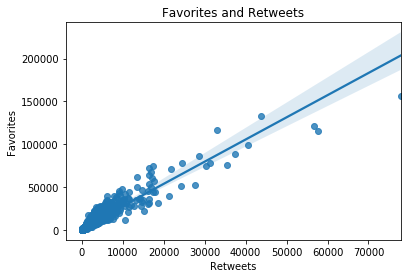

In [81]:
g = sns.regplot(x=twitter_archive_clean.retweets, y=twitter_archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('plot_01.png')

In [82]:
twitter_archive_clean['dog_type'].value_counts()

golden_retriever        157
Labrador_retriever      106
Pembroke                 95
Chihuahua                91
pug                      62
                       ... 
clumber                   1
Bouvier_des_Flandres      1
silky_terrier             1
Irish_wolfhound           1
EntleBucher               1
Name: dog_type, Length: 113, dtype: int64

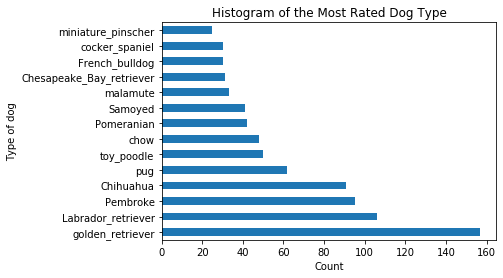

In [83]:
df_dog_type = twitter_archive_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('plot_02.png',bbox_inches='tight');

In [84]:
df_dog_type_mean = twitter_archive_clean.groupby('dog_type').mean()
df_dog_type_mean.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,year,month,day
dog_type,,,,,,,,
Afghan_hound,-6.765950e+08,15801.333333,5224.666667,8.784371e+06,146204.666667,2016.333333,7.666667,11.000000
Airedale,2.139754e+08,4827.000000,1226.583333,8.784385e+06,146204.916667,2015.583333,8.750000,15.916667
American_Staffordshire_terrier,-9.022505e+07,7731.600000,1810.466667,8.784379e+06,146204.933333,2016.133333,5.400000,15.866667
Appenzeller,-1.285796e+08,6705.000000,1263.000000,8.784374e+06,146204.500000,2016.500000,4.500000,18.500000
Australian_terrier,-1.579751e+09,10217.500000,2736.000000,8.784376e+06,146204.500000,2016.500000,3.500000,7.000000


In [67]:
df_dog_type_count = twitter_archive_clean.groupby('dog_type').count()
df_dog_type_count

,tweet_id,source,text,name,favorites,retweets,user_followers,user_favourites,jpg_url,dog_stage,year,month,day,confidence_list,rating
dog_type,,,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3
Airedale,12,12,12,9,12,12,12,12,12,1,12,12,12,12,12
American_Staffordshire_terrier,15,15,15,10,15,15,15,15,15,3,15,15,15,15,15
Appenzeller,2,2,2,1,2,2,2,2,2,0,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,50,50,50,38,50,50,50,50,50,8,50,50,50,50,50
toy_terrier,3,3,3,2,3,3,3,3,3,0,3,3,3,3,3
vizsla,13,13,13,10,13,13,13,13,13,1,13,13,13,13,13
